<a href="https://colab.research.google.com/github/Realcoder121/Realcoder121/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt

In [3]:
def clean_dataset(Df):
    train_np = Df.to_numpy()
    col = np.shape(train_np)[1]-1
    y = train_np[:,col]
    x = train_np[:,1:col]
    m = np.shape(train_np)[0] #number of training examples
    y = y.reshape(m,1)
    x = np.concatenate((np.ones((m,1)),x),axis=1)
    n = np.shape(x)[1]
    # scaling dataset
    for i in range(1,n):
        mean_col = np.mean(x[:,i])
        std_dev_col = np.std(x[:,i])
        x[:,i] = (x[:,i]-mean_col)/std_dev_col
    return(x,y)

In [5]:
def grad_desc(x,theta,y):
    m,n = np.shape(x)
    alpha = 0.01
    num = 5000
    J = []
    for i in range(num):
        hyp = np.matmul(x,theta)
        J.append((1/2*m)*np.sum(np.square(hyp - y)))
        theta -= (alpha/m)*np.matmul(x.T,(hyp - y))
    return(theta,J)
    

[[ 1537.40898405]
 [  374.84297316]
 [   57.66355878]
 [ -780.65390906]
 [  230.87239175]
 [ 1068.01409067]
 [   87.20446456]
 [  548.72479312]
 [ -837.63793397]
 [   34.67370773]
 [  662.52453914]
 [  896.38283869]
 [   86.47649282]
 [-2631.25005955]
 [  980.57481622]
 [ 1301.44464438]
 [ 1476.95436293]
 [  693.42415381]
 [  -29.25523734]
 [ 2746.11651838]
 [  723.36220031]]


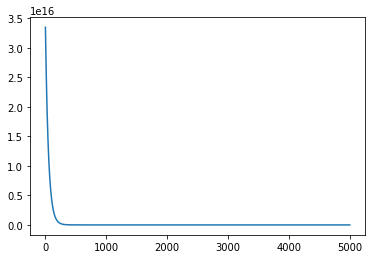

In [10]:
Df = pd.read_csv("/content/drive/MyDrive/ML/Linear_train.csv")
x,y = clean_dataset(Df)
n = np.shape(x)[1]
theta = np.zeros((n,1)) # initializing theta 
theta,J_list=grad_desc(x,theta,y) # performing gradient descent on theta
print(theta)
x = []
for i in range(len(J_list)):
   x.append(i+1)
plt.plot(x,J_list)
plt.show()


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
def RMSE(y,pred):
    t = np.mean(np.square(y - pred))
    t = sqrt(t)
    return(t)

In [12]:
def Mean_Error(y,pred):
  t = np.mean(np.abs(y-pred))
  return(t)

In [15]:
Df_test = pd.read_csv("/content/drive/MyDrive/ML/Linear_test.csv")
x_test,y_test = clean_dataset(Df_test)
pred = np.matmul(x_test,theta)
print(pred)
#calculate RMSE
print(RMSE(y_test,pred)) # root mean squared error
print(Mean_Error(y_test,pred)) # mean absolute error



[[ -233.64054661]
 [ 6422.72630517]
 [ 2322.77488195]
 ...
 [-1498.64989629]
 [ 1907.98807241]
 [-6201.64051423]]
74.76077433519104
71.14879228237875
